In [115]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [116]:
# Подключаем датасет
data=pd.read_csv('wine-clustering.csv')
# Выводим первые 7 значений датасета
data.head(7)

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71 2.43         15.60        127           2.80   
1    13.20        1.78 2.14         11.20        100           2.65   
2    13.16        2.36 2.67         18.60        101           2.80   
3    14.37        1.95 2.50         16.80        113           3.85   
4    13.24        2.59 2.87         21.00        118           2.80   
5    14.20        1.76 2.45         15.20        112           3.27   
6    14.39        1.87 2.45         14.60         96           2.50   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0        3.06                  0.28             2.29             5.64 1.04   
1        2.76                  0.26             1.28             4.38 1.05   
2        3.24                  0.30             2.81             5.68 1.03   
3        3.49                  0.24             2.18             7.80 0.86   
4        2.69                  0.39             1.82             4.32 1.04   
5        3.39                  0.34             1.97             6.75 1.05   
6        2.52                  0.30             1.98             5.25 1.02   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290

In [117]:
data.describe()
# В конкстексте текущей задачи к данному датасету, который достаточно полный для кластеризации, не представляется возможным
# добавление информативного атрибута, который будет рассчитан из имеющихся данных

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00 178.00        178.00     178.00         178.00   
mean     13.00        2.34   2.37         19.49      99.74           2.30   
std       0.81        1.12   0.27          3.34      14.28           0.63   
min      11.03        0.74   1.36         10.60      70.00           0.98   
25%      12.36        1.60   2.21         17.20      88.00           1.74   
50%      13.05        1.87   2.36         19.50      98.00           2.35   
75%      13.68        3.08   2.56         21.50     107.00           2.80   
max      14.83        5.80   3.23         30.00     162.00           3.88   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean         2.03                  0.36             1.59             5.06   
std          1.00                  0.12             0.57             2.32   
min          0.34                  0.13             0.41             1.28   
25%          1.21                  0.27             1.25             3.22   
50%          2.13                  0.34             1.56             4.69   
75%          2.88                  0.44             1.95             6.20   
max          5.08                  0.66             3.58            13.00   

         Hue  OD280  Proline  
count 178.00 178.00   178.00  
mean    0.96   2.61   746.89  
std     0.23   0.71   314.91  
min     0.48   1.27   278.00  
25%     0.78   1.94   500.50  
50%     0.96   2.78   673.50  
75%     1.12   3.17   985.00  
max     1.71   4.00  1680.00

In [118]:
# Определяем, есть ли пропущенные значения (как видим, их нет)
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

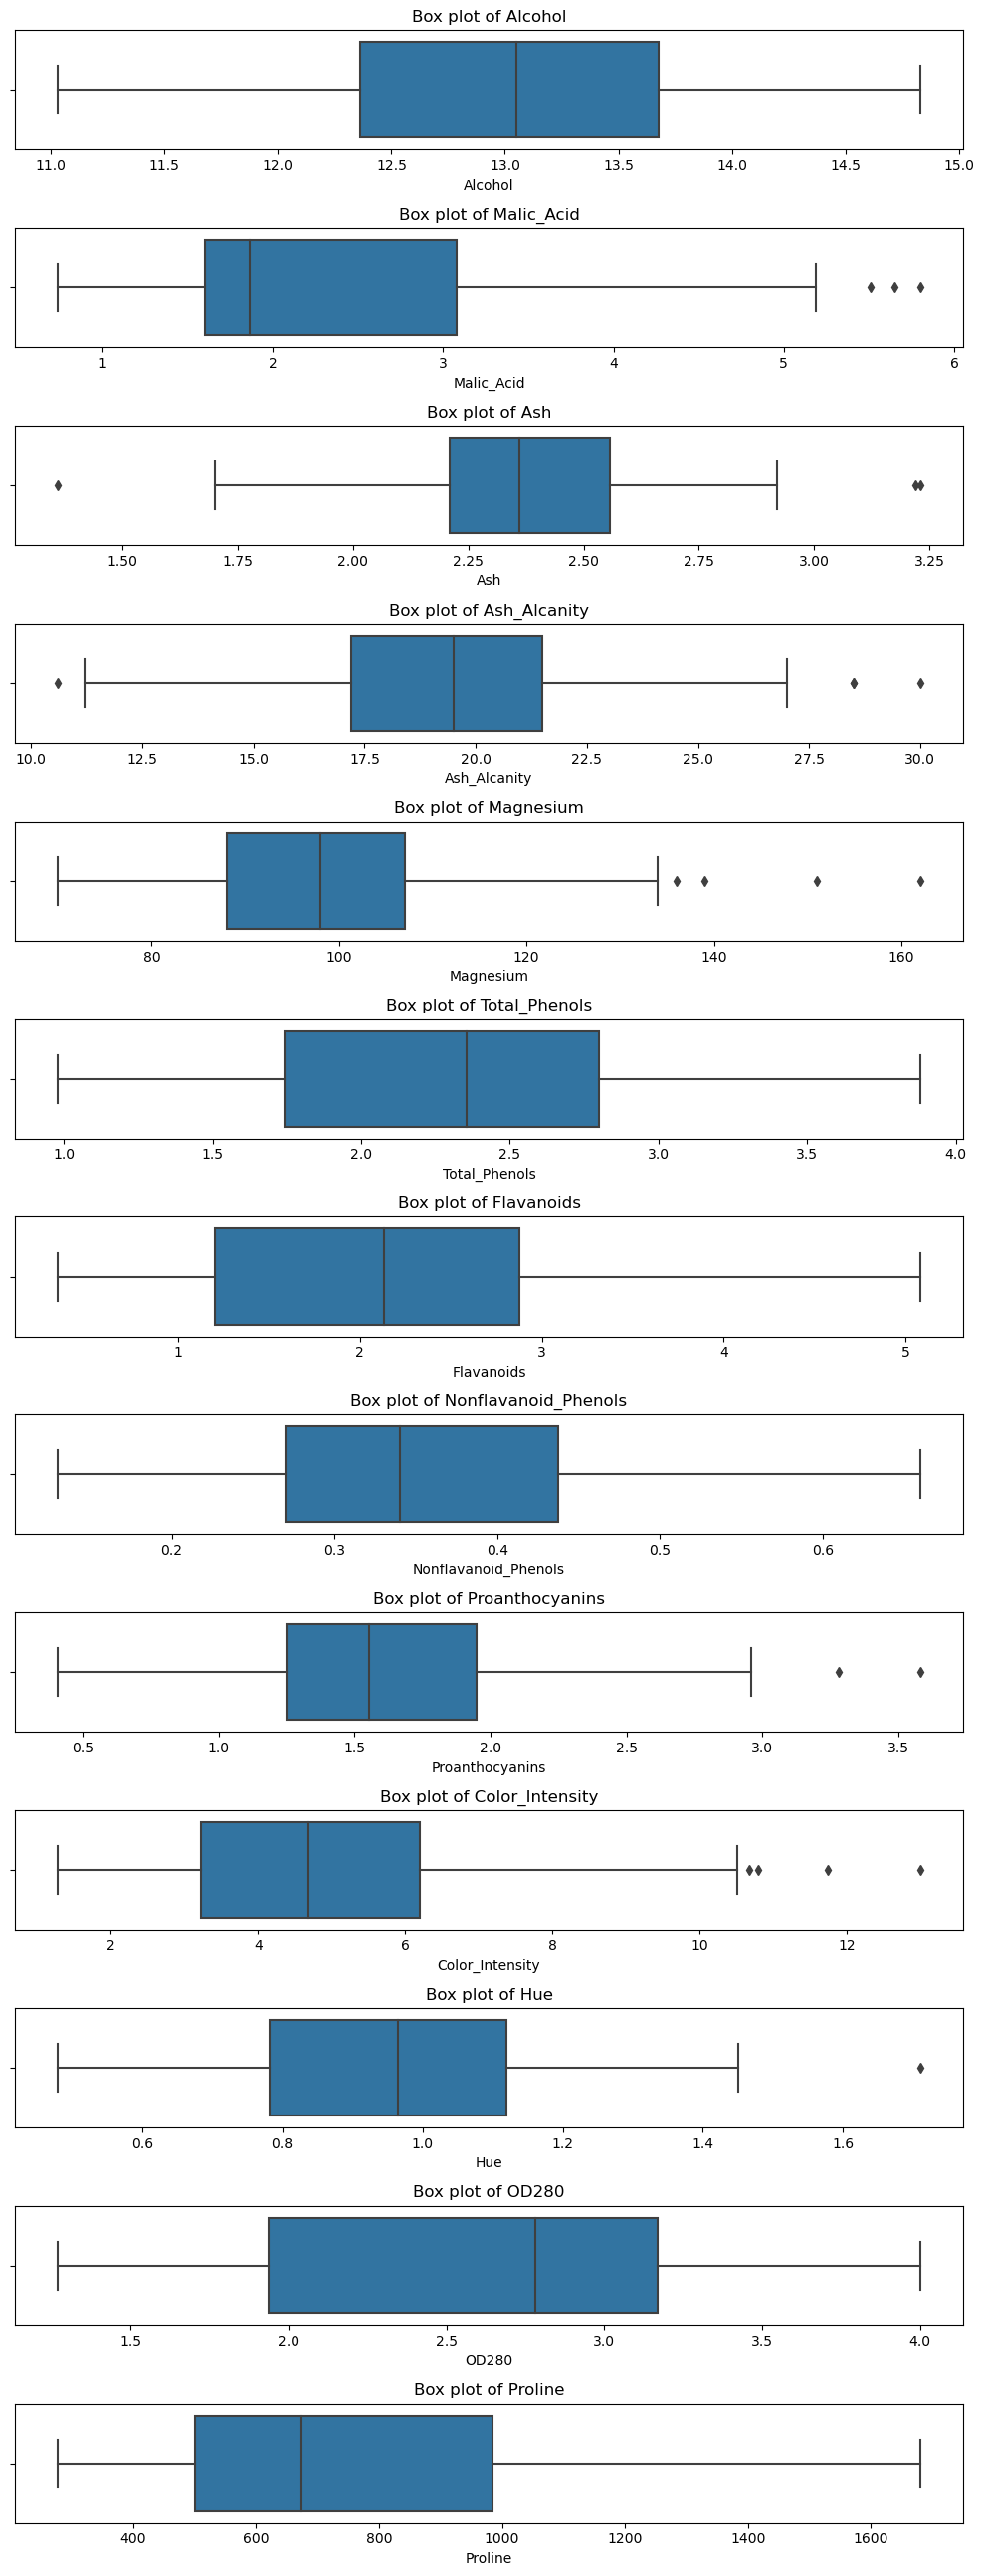

In [119]:
# Визуализация выбросов
fig, axs = plt.subplots(len(data.columns), 1, figsize=(10, len(data.columns)*2))

for i, column in enumerate(data.columns):
  sns.boxplot(x=data[column], ax=axs[i])
  axs[i].set_title('Box plot of ' + column)

plt.tight_layout()
plt.show()


In [120]:
# Удаление выбросов
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Определение индексов строк, которые содержат выбросы
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))].dropna(how='all').index

# Удаление выбросов из датафрейма
data_clean = data.drop(outliers)

# Вывод удаленных значений
print(data.loc[outliers])

data = data_clean

     Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
25     13.05        2.05 3.22         25.00        124           2.63   
59     12.37        0.94 1.36         10.60         88           1.98   
69     12.21        1.19 1.75         16.80        151           1.85   
73     12.99        1.67 2.60         30.00        139           3.30   
78     12.33        0.99 1.95         14.80        136           1.90   
95     12.47        1.52 2.20         19.00        162           2.50   
110    11.46        3.74 1.82         19.50        107           3.18   
115    11.03        1.51 2.20         21.50         85           2.46   
121    11.56        2.05 3.23         28.50        119           3.18   
123    13.05        5.80 2.13         21.50         86           2.62   
127    11.79        2.13 2.78         28.50         92           2.13   
137    12.53        5.51 2.64         25.00         96           1.79   
151    12.79        2.67 2.48         22.00        

In [121]:
# Удаление дубликатов
data.drop_duplicates(inplace=True)

# Сброс индекса
data.reset_index(drop=True, inplace=True)

# Отображение обновленного DataFrame
display(data)

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71 2.43         15.60        127           2.80   
1      13.20        1.78 2.14         11.20        100           2.65   
2      13.16        2.36 2.67         18.60        101           2.80   
3      14.37        1.95 2.50         16.80        113           3.85   
4      13.24        2.59 2.87         21.00        118           2.80   
..       ...         ...  ...           ...        ...            ...   
156    14.16        2.51 2.48         20.00         91           1.68   
157    13.40        3.91 2.48         23.00        102           1.80   
158    13.27        4.28 2.26         20.00        120           1.59   
159    13.17        2.59 2.37         20.00        120           1.65   
160    14.13        4.10 2.74         24.50         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0          3.06                  0.28             2.29             5.64 1.04   
1          2.76                  0.26             1.28             4.38 1.05   
2          3.24                  0.30             2.81             5.68 1.03   
3          3.49                  0.24             2.18             7.80 0.86   
4          2.69                  0.39             1.82             4.32 1.04   
..          ...                   ...              ...              ...  ...   
156        0.70                  0.44             1.24             9.70 0.62   
157        0.75                  0.43             1.41             7.30 0.70   
158        0.69                  0.43             1.35            10.20 0.59   
159        0.68                  0.53             1.46             9.30 0.60   
160        0.76                  0.56             1.35             9.20 0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
156   1.71      660  
157   1.56      750  
158   1.56      835  
159   1.62      840  
160   1.60      560  

[161 rows x 13 columns]

In [122]:
# Вычисление матрицы корреляции
correlation_matrix = data.corr() # Используйте .corr() для коэффициента Пирсона или .corr(method='spearman') для коэффициента Спирмена

# Нахождение наиболее коррелирующих атрибутов
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)
highest_correlations = correlation_values[correlation_values != 1] # Исключаем корреляцию атрибута с самим собой

# Вывод наиболее коррелирующих атрибутов
print(highest_correlations.head(10))

Total_Phenols    Flavanoids        0.88
Flavanoids       Total_Phenols     0.88
OD280            Flavanoids        0.78
Flavanoids       OD280             0.78
Proanthocyanins  Flavanoids        0.74
Flavanoids       Proanthocyanins   0.74
OD280            Total_Phenols     0.70
Total_Phenols    OD280             0.70
Proline          Alcohol           0.66
Alcohol          Proline           0.66
dtype: float64


В данном блоке кода я пытаюсь определить наиболее коррелирующие атрибуты. В датасете wine 13 атрибутов и суммарно 78 возможных пар значений (если считать без повторений), что неэффективно производить визуальный анализ для выявления наиболее подходящих пар

## Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров

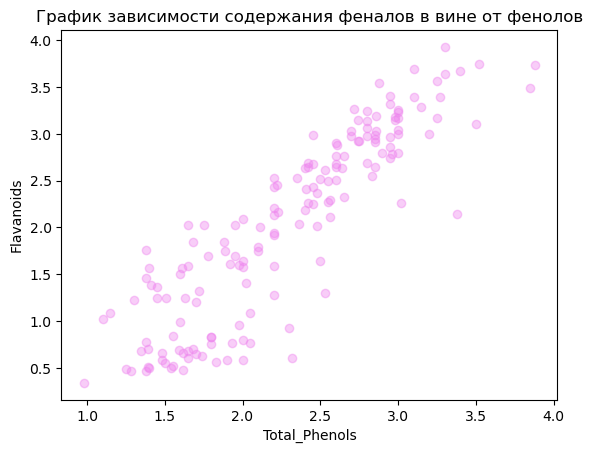

In [123]:
# Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров
plt.scatter(data['Total_Phenols'], data['Flavanoids'], color='violet', alpha=0.4)
plt.xlabel("Total_Phenols")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от фенолов")
plt.show()

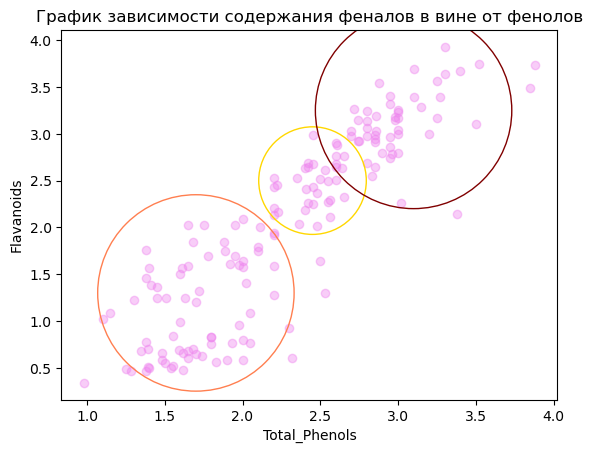

In [124]:
plt.scatter(data['Total_Phenols'], data['Flavanoids'], color='violet', alpha=0.4)
plt.xlabel("Total_Phenols")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от фенолов")
plt.scatter( 1.7 , 1.3 , s = 20000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 2.45 , 2.5 , s = 6000, facecolors='none', edgecolors='gold' ) 
plt.scatter( 3.1 , 3.25 , s = 20000, facecolors='none', edgecolors='maroon' )  
plt.show()

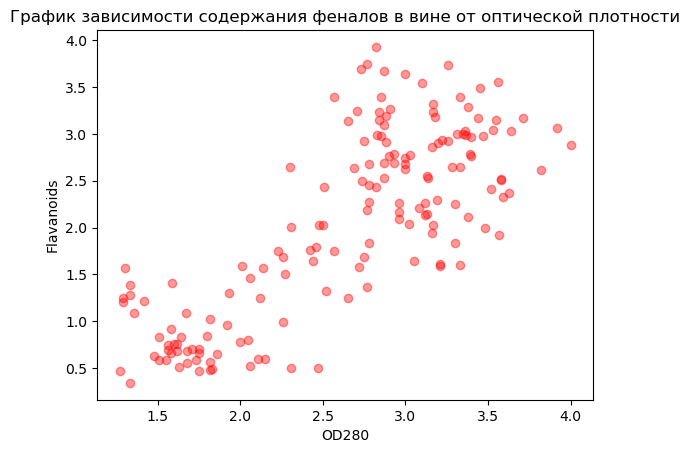

In [125]:
# Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров
plt.scatter(data['OD280'], data['Flavanoids'], color='red', alpha=0.4)
plt.xlabel("OD280")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от оптической плотности")
plt.show()

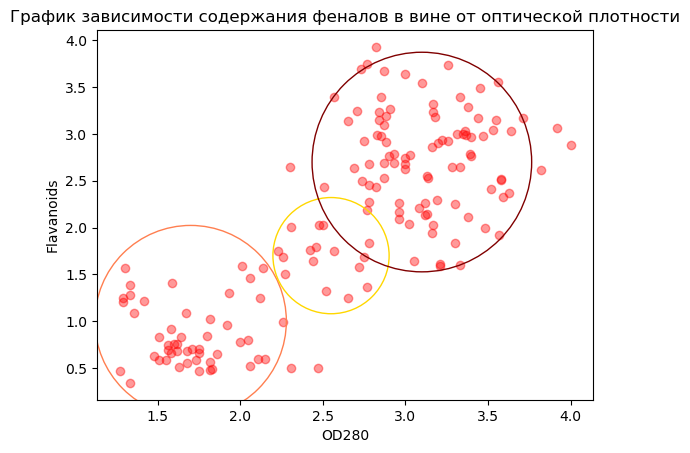

In [126]:
plt.scatter(data['OD280'], data['Flavanoids'], color='red', alpha=0.4)
plt.xlabel("OD280")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от оптической плотности")
plt.scatter( 1.7 , 1.0 , s = 19000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 2.55 , 1.7 , s = 7000, facecolors='none', edgecolors='gold' ) 
plt.scatter( 3.1 , 2.7 , s = 25000, facecolors='none', edgecolors='maroon' )  
plt.show()

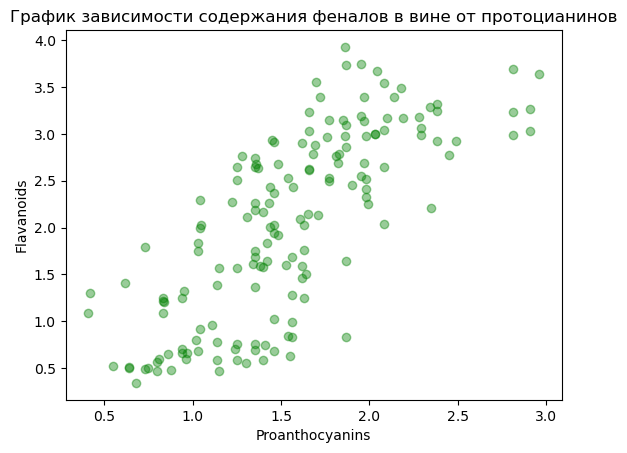

In [127]:
# Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров
plt.scatter(data['Proanthocyanins'], data['Flavanoids'], color='green', alpha=0.4)
plt.xlabel("Proanthocyanins")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от протоцианинов")
plt.show()

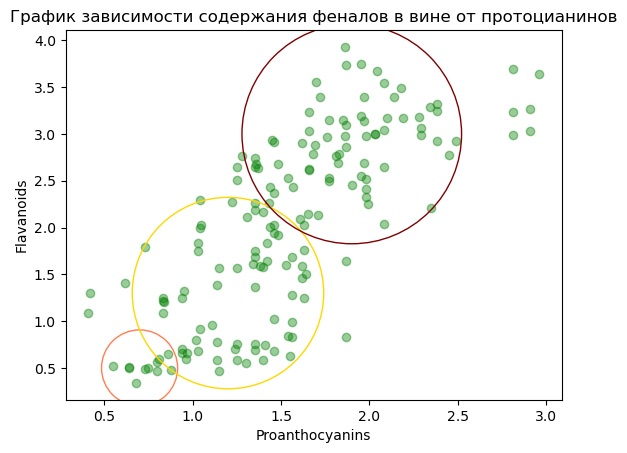

In [128]:
plt.scatter(data['Proanthocyanins'], data['Flavanoids'], color='green', alpha=0.4)
plt.xlabel("Proanthocyanins")
plt.ylabel("Flavanoids")
plt.title("График зависимости содержания феналов в вине от протоцианинов")
plt.scatter( 0.7 , 0.5 , s = 3000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 1.2 , 1.3 , s = 19000, facecolors='none', edgecolors='gold' ) 
plt.scatter( 1.9 , 3.0 , s = 25000, facecolors='none', edgecolors='maroon' )  
plt.show()

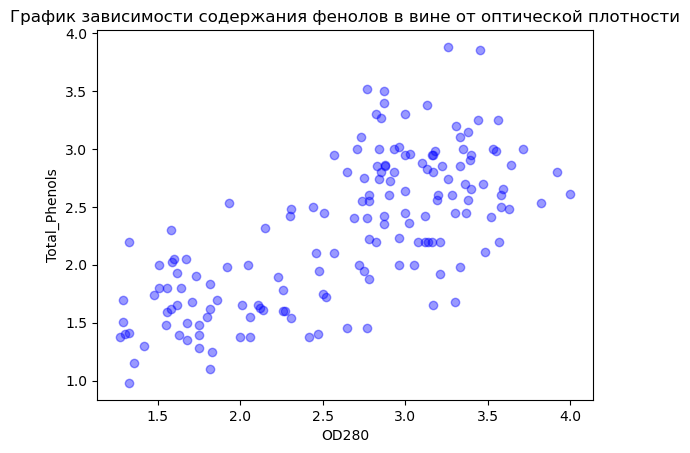

In [129]:
# Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров
plt.scatter(data['OD280'], data['Total_Phenols'], color='blue', alpha=0.4)
plt.xlabel("OD280")
plt.ylabel("Total_Phenols")
plt.title("График зависимости содержания фенолов в вине от оптической плотности")
plt.show()

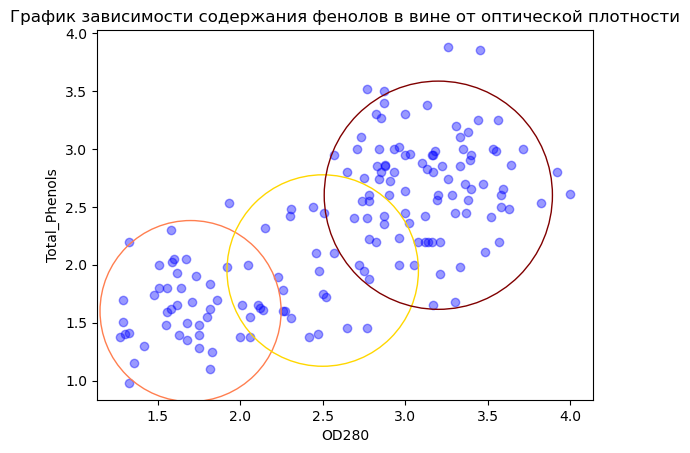

In [130]:
plt.scatter(data['OD280'], data['Total_Phenols'], color='blue', alpha=0.4)
plt.xlabel("OD280")
plt.ylabel("Total_Phenols")
plt.title("График зависимости содержания фенолов в вине от оптической плотности")
plt.scatter( 1.7 , 1.6 , s = 17000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 2.5 , 1.95 , s = 19000, facecolors='none', edgecolors='gold' ) 
plt.scatter( 3.2 , 2.6 , s = 27000, facecolors='none', edgecolors='maroon' )  
plt.show()

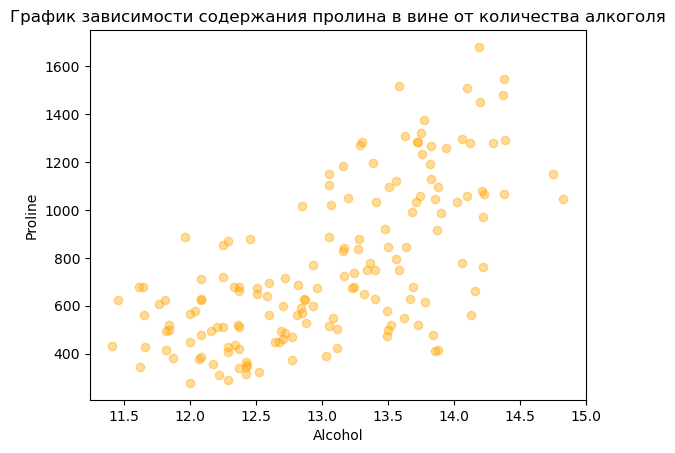

In [131]:
# Построение графика зависимости, и далее - визуализация определенных визуальным анализом кластеров
plt.scatter(data['Alcohol'], data['Proline'], color='orange', alpha=0.4)
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.title("График зависимости содержания пролина в вине от количества алкоголя")
plt.show()

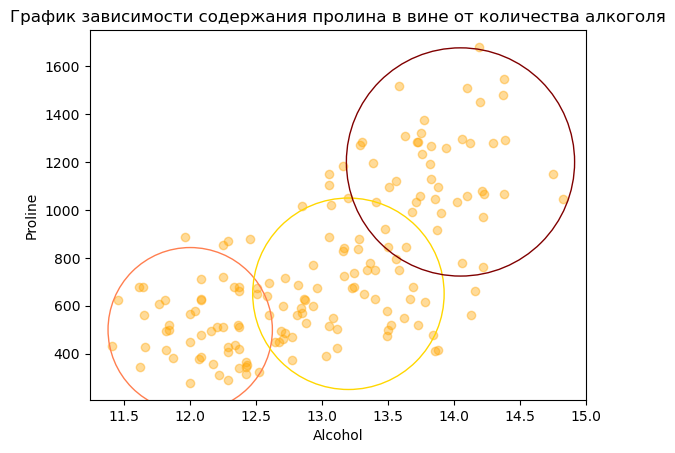

In [132]:
plt.scatter(data['Alcohol'], data['Proline'], color='orange', alpha=0.4)
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.title("График зависимости содержания пролина в вине от количества алкоголя")
plt.scatter( 12.0 , 500 , s = 14000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 13.2 , 650 , s = 19000, facecolors='none', edgecolors='gold' ) 
plt.scatter( 14.05 , 1200 , s = 27000, facecolors='none', edgecolors='maroon' )  
plt.show()

## Реализация метода K-Means

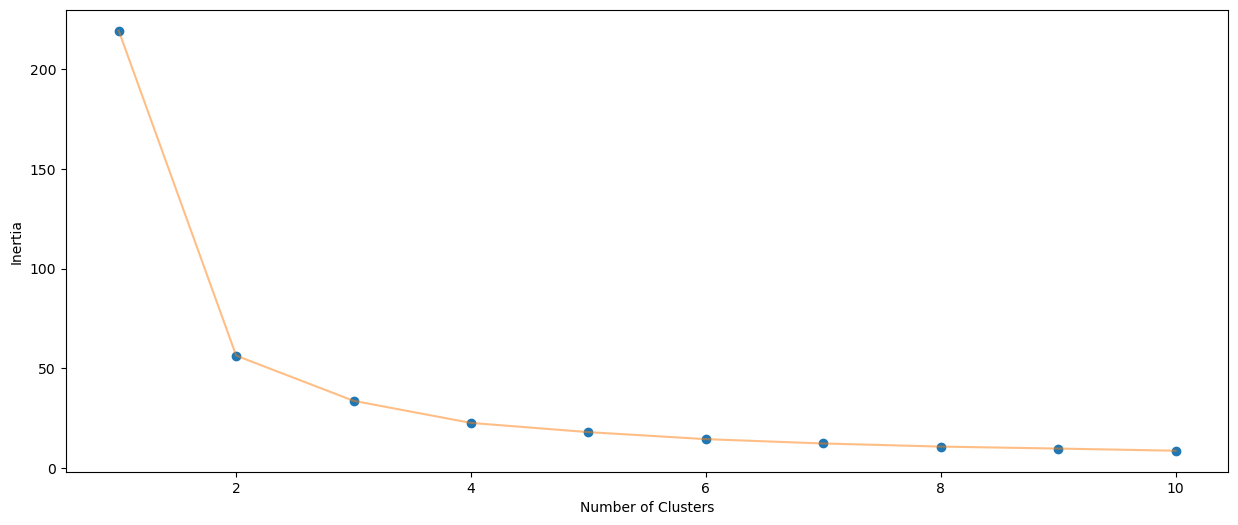

In [133]:
# Зависимость содержания феналов в вине от фенолов
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Total_Phenols' , 'Flavanoids']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Был использован подход, называемый «метод локтя», чтобы найти наилучшее значение N. Для этого был построен график зависимости инерции от количества кластеров, или N. Можно заметить, что до N=3 наблюдается быстрое уменьшение отклонения, но потом отклонение перестает падать также быстро. Значит это и есть подходящее значение, такое, что общее отклонение внутри каждого кластера становится достаточно мало.

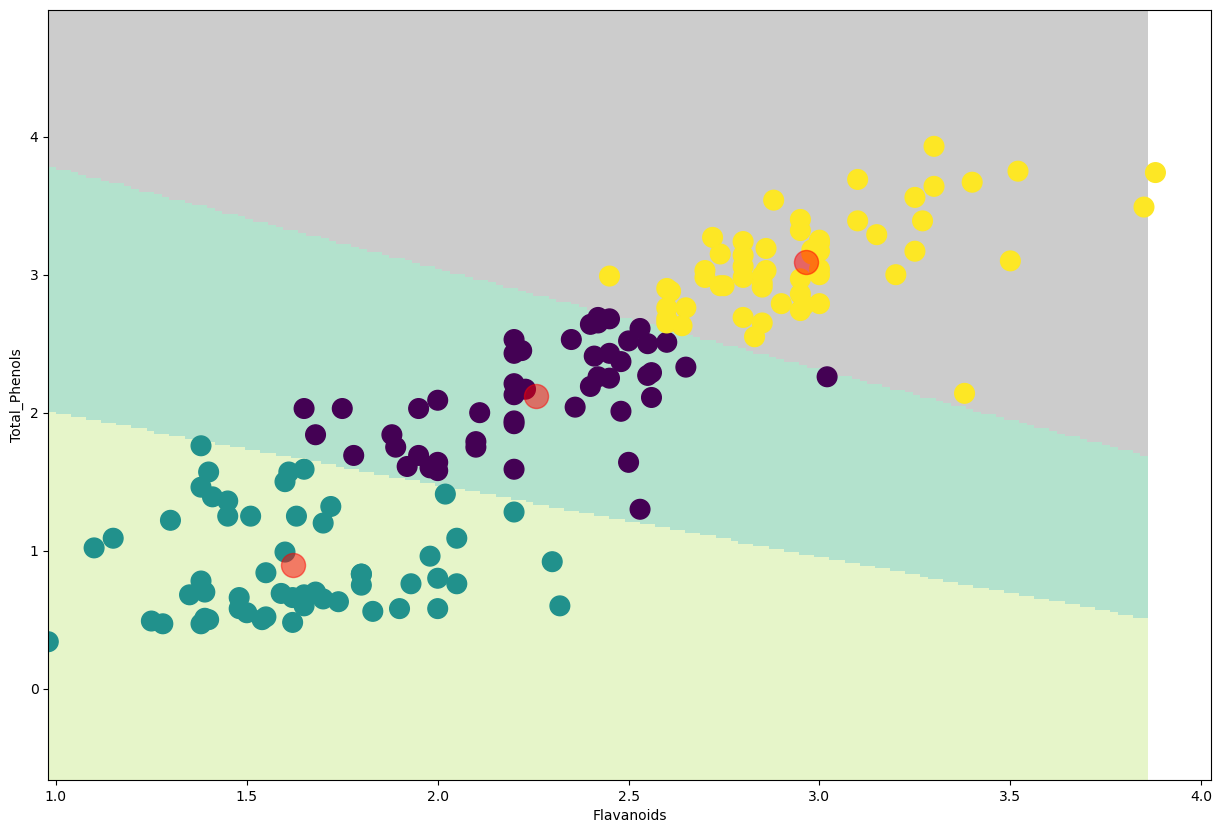

In [134]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Total_Phenols' ,y = 'Flavanoids' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Total_Phenols')
plt.xlabel('Flavanoids')
plt.show()

Примечание: итоговые центры кластеров помечены красным

Вывод из зависимости 1:
Сравнивая результат работы алгоритма и визуальный анализ, можно сделать вывод, что в первой зависимости (зависимость содержания фенолов от феналов) при визуальном анализе удалось определить верное количество кластеров(3), но их расположение было установлено не совсем точно.

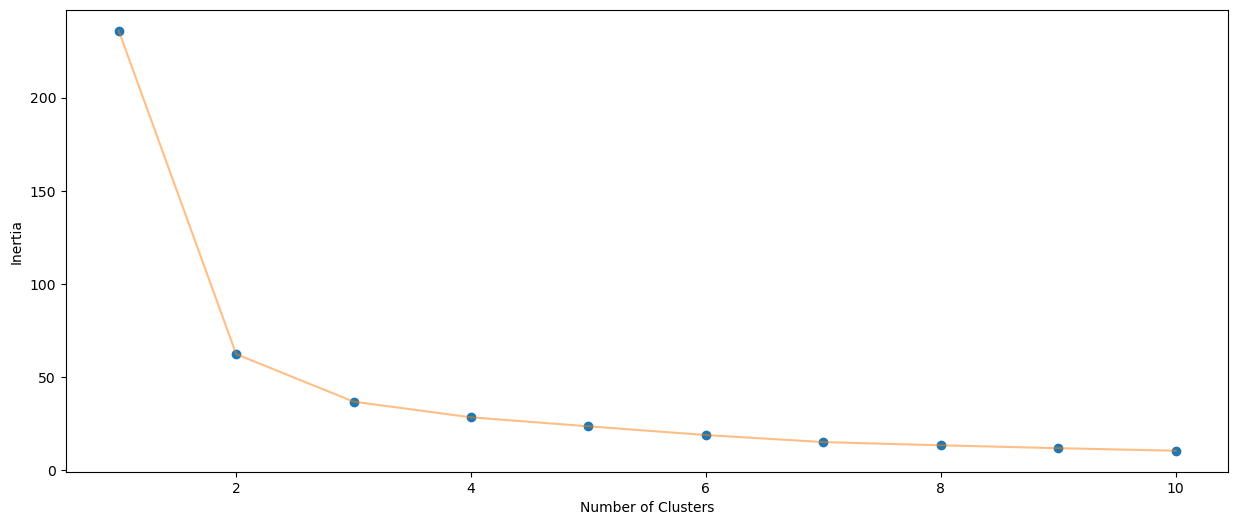

In [135]:
# Зависимость содержания феналов в вине от фенолов
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['OD280' , 'Flavanoids']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Берем N = 3

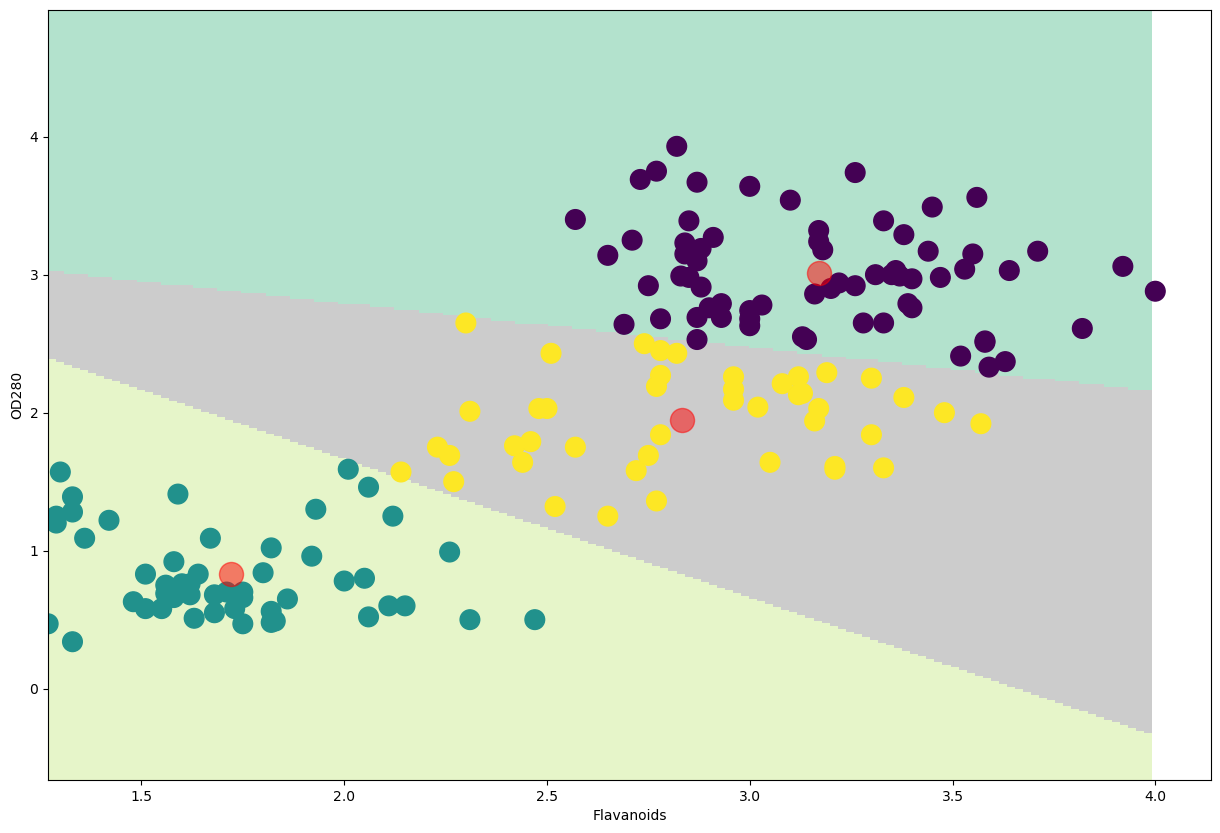

In [136]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'OD280' ,y = 'Flavanoids' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('OD280')
plt.xlabel('Flavanoids')
plt.show()

Вывод из зависимости 2:
Сравнивая результат работы алгоритма и визуальный анализ, можно сделать вывод, что в второй зависимости при визуальном анализе удалось определить верное количество кластеров(3), и их расположение было установлено достаточно точно.

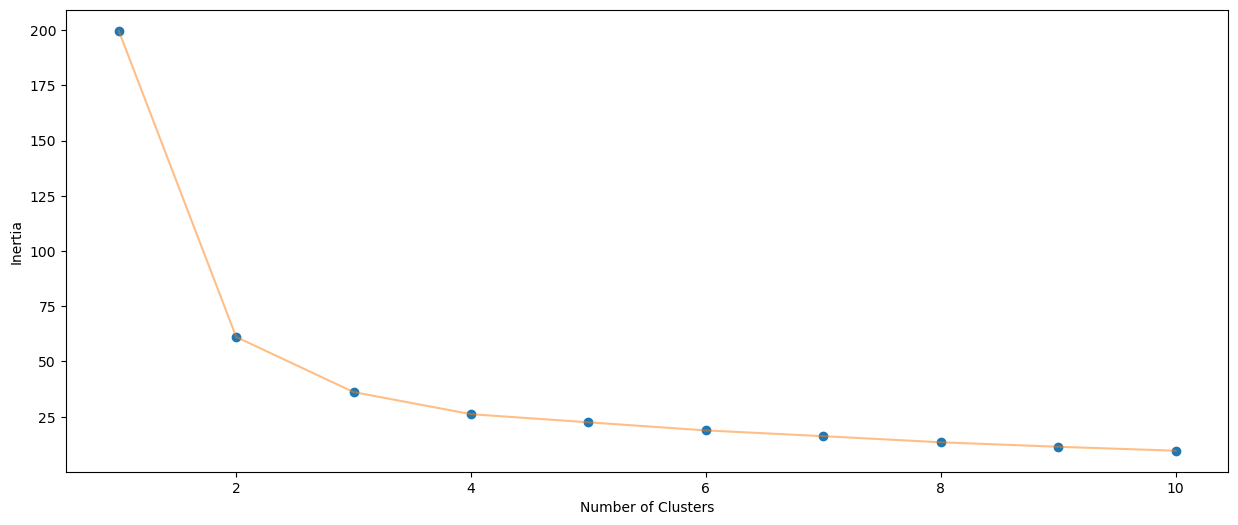

In [137]:
# Зависимость содержания феналов в вине от фенолов
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Proanthocyanins' , 'Flavanoids']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Берем N = 3

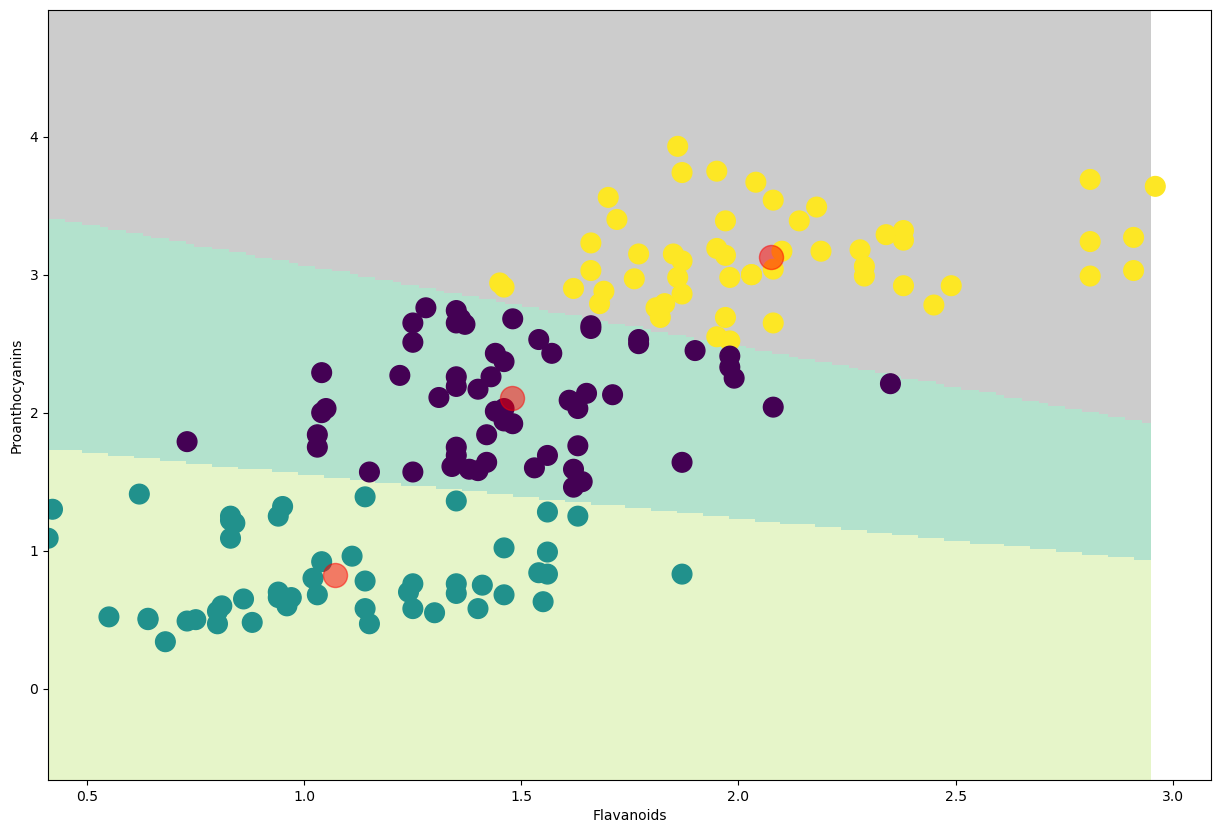

In [138]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Proanthocyanins' ,y = 'Flavanoids' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Proanthocyanins')
plt.xlabel('Flavanoids')
plt.show()

Вывод из зависимости 3:
Сравнивая результат работы алгоритма и визуальный анализ, можно сделать вывод, что в третьей зависимости при визуальном анализе удалось определить верное количество кластеров(3), но их расположение было установлено недостаточно точно.

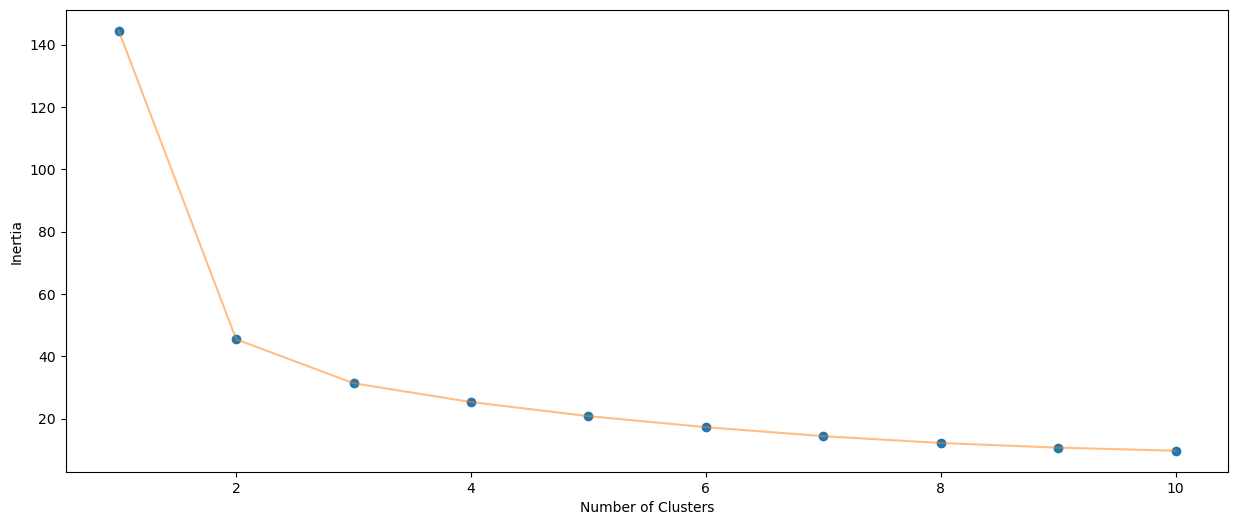

In [139]:
# Зависимость содержания феналов в вине от фенолов
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['OD280' , 'Total_Phenols']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Берем N = 3

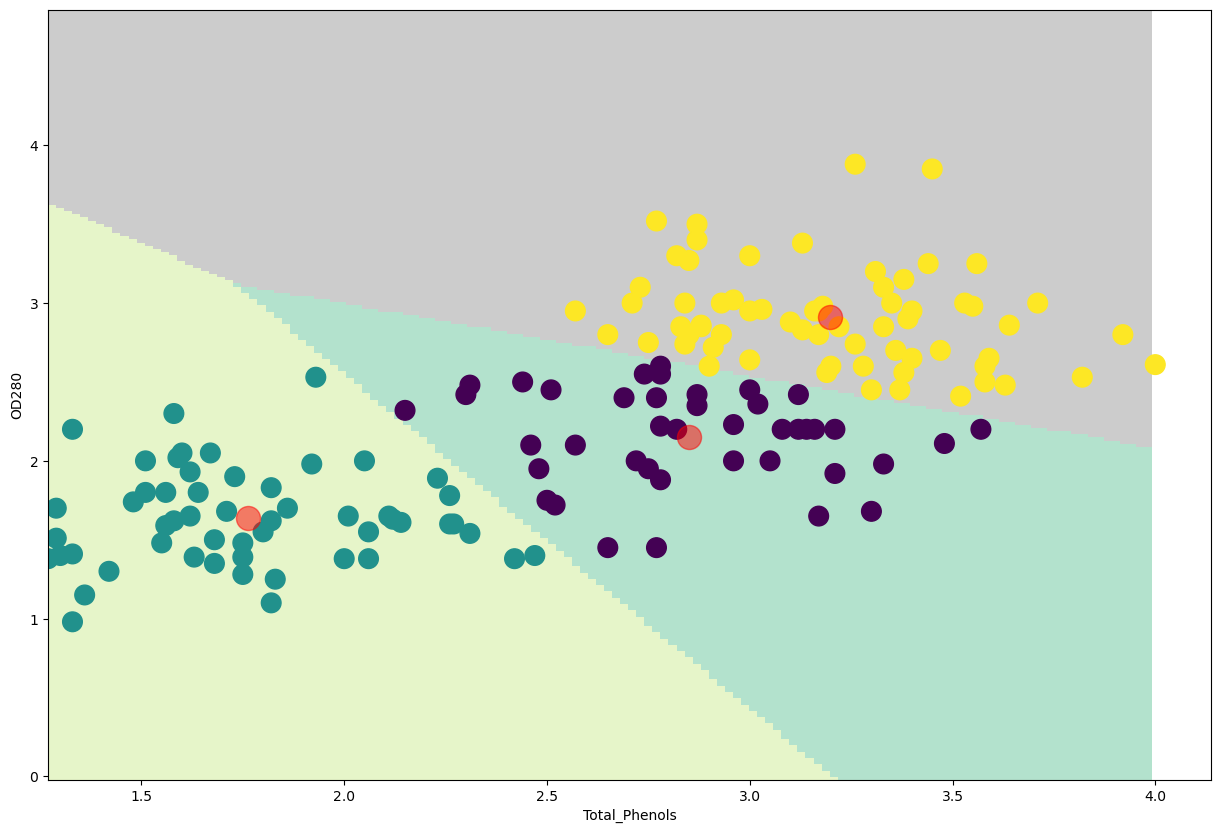

In [140]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'OD280' ,y = 'Total_Phenols' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('OD280')
plt.xlabel('Total_Phenols')
plt.show()

Вывод из зависимости 4:
Сравнивая результат работы алгоритма и визуальный анализ, можно сделать вывод, что в первой зависимости при визуальном анализе удалось определить верное количество кластеров(3), и их расположение было установлено достаточно точно.

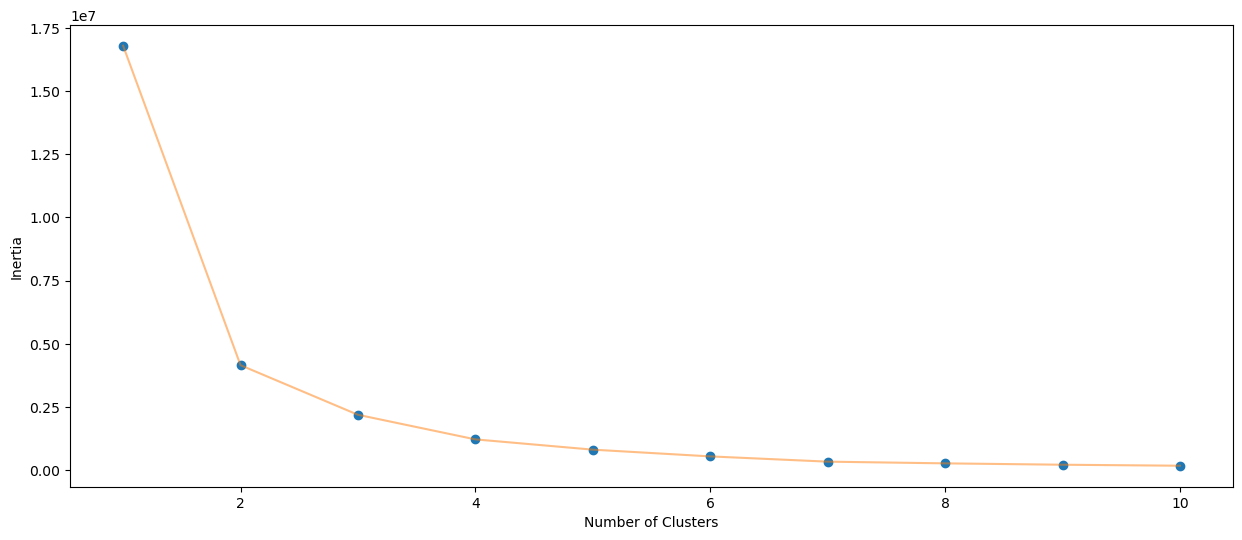

In [141]:
# Зависимость содержания феналов в вине от фенолов
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Alcohol' , 'Proline']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Берем N = 4

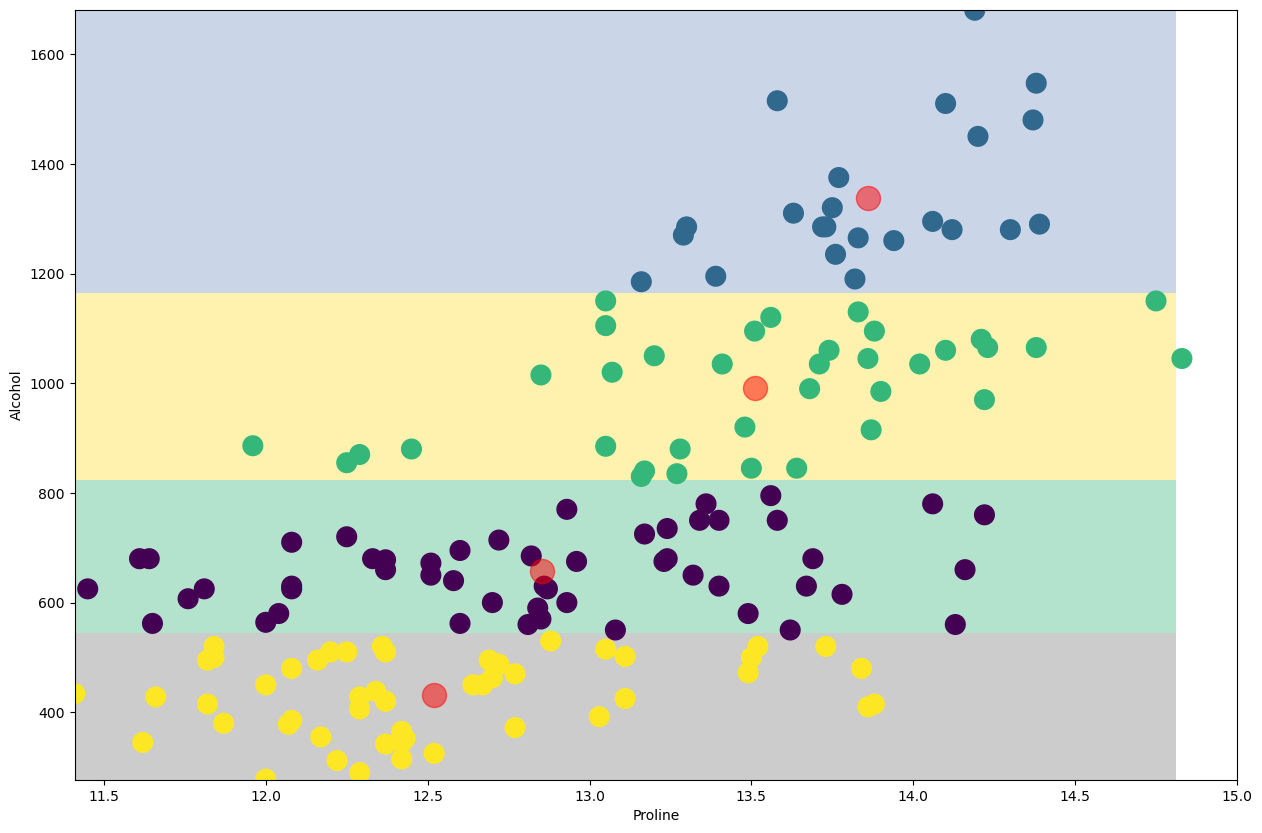

In [142]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Alcohol' ,y = 'Proline' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Alcohol')
plt.xlabel('Proline')
plt.show()

Вывод из зависимости 5:
В зависимости содержания пролина от количества алкоголя при первичном анализе было неверно определено количество групп. В следствие визуального исследование был сделан вывод, что их следует выделить 3, но в результате использования "метода локтя" наилучшее N было равно 4. Однако расположение кластеров было определено достаточно точно и до использования алгоритма.

## Вывод


Во время выполнения этой лабораторной работы мы исследовали выбранный нами набор данных, представленный в виде графиков зависимостей, и применили к нему метод кластеризации KMeans. Мы также изучили, как определить оптимальное количество групп.

На основе выполненной работы можно сделать вывод о том, что визуальный анализ данных в виде зависимостей не всегда дает точные результаты и может быть менее надежным по сравнению с алгоритмическим подходом.